<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
Accuracy: 0.8339134758826454


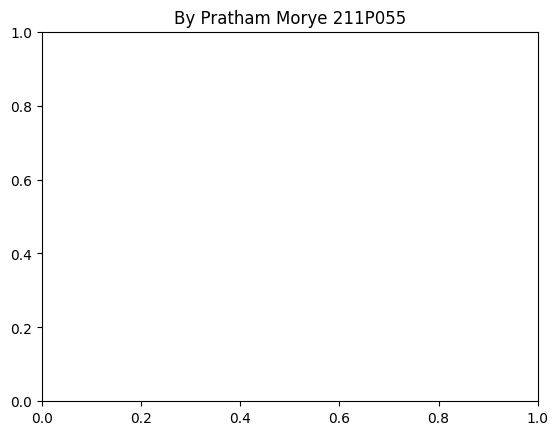

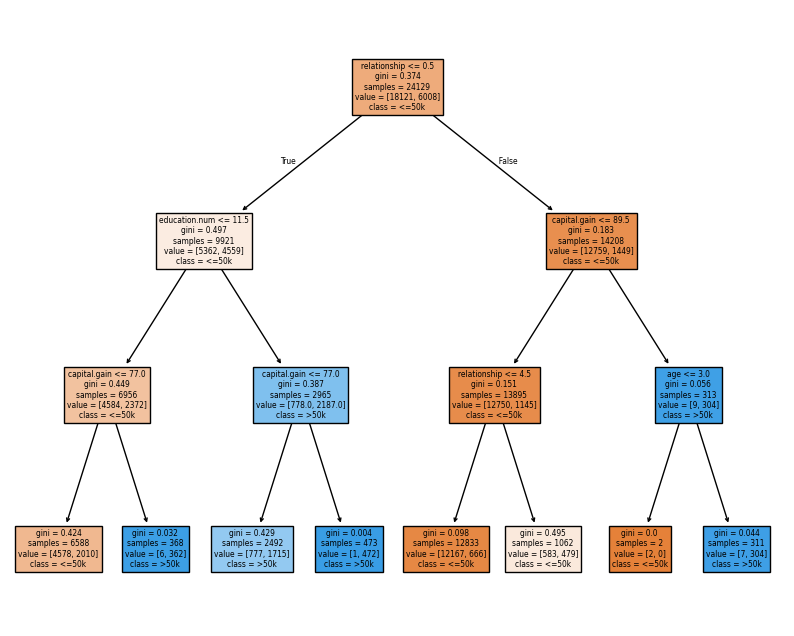

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('adult_dataset.csv')
df.info()
df.head()
df.isin(['?']).sum(axis=0)
df=df.replace('?',np.nan)
df=df.dropna()
df.isin(['?']).sum(axis=0)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)
df.head()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
x=df.drop('income',axis=1)
y=df['income']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
clf=DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
plt.title("By Pratham Morye 211P055")
plt.figure(figsize=(10,8))
plot_tree(decision_tree=clf,feature_names=x.columns,class_names=['<=50k','>50k'],filled=True)
plt.show()


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
Accuracy: 100.00%

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00

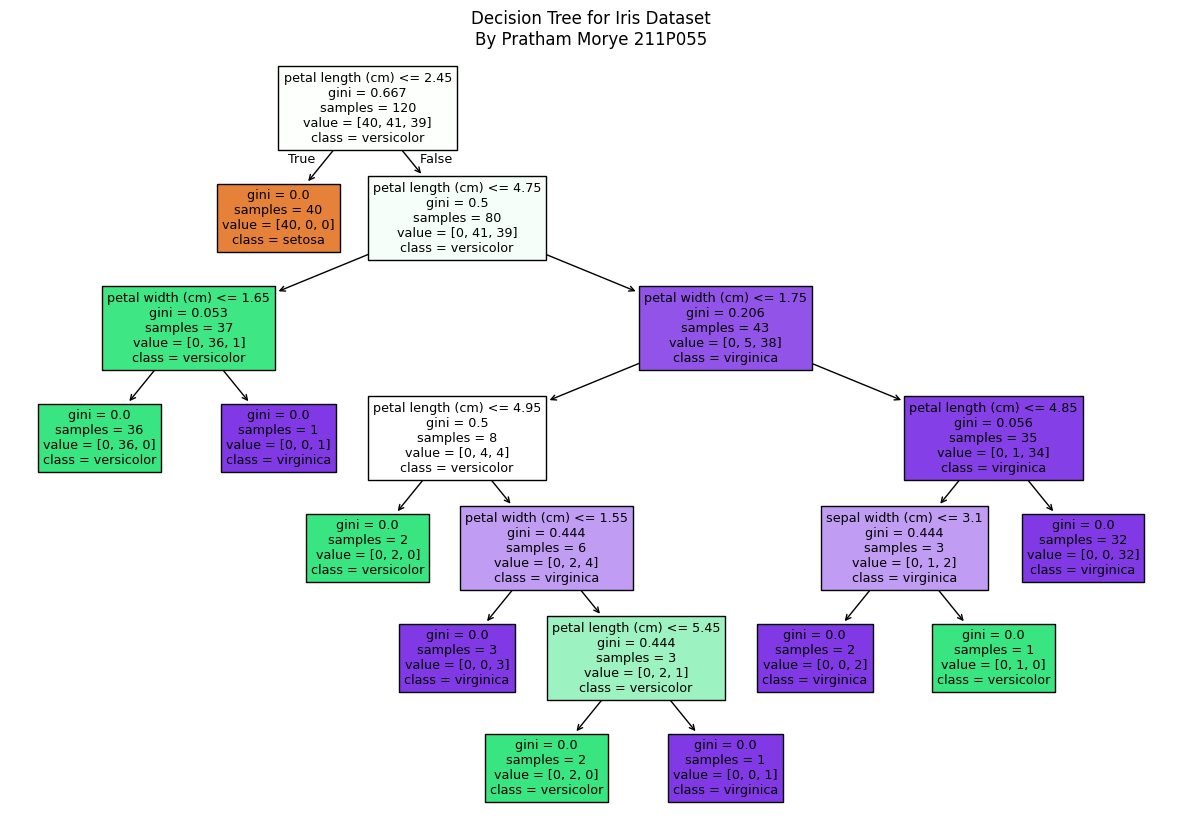

sepal length (cm): 0.00
sepal width (cm): 0.02
petal length (cm): 0.91
petal width (cm): 0.08


In [3]:
# PostLAB
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (0: Iris-setosa, 1: Iris-versicolour, 2: Iris-virginica)

# Convert to a DataFrame for easy analysis (optional)
df = pd.DataFrame(data=np.c_[X, y], columns=iris['feature_names'] + ['species'])
print(df.head())  # Show first few rows

# 2. Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = clf.predict(X_test)

# 5. Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)

# Display classification report (precision, recall, F1-score for each class)
classification_report = metrics.classification_report(y_test, y_pred, target_names=iris.target_names)
print("\nClassification Report:")
print(classification_report)

# 6. Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree for Iris Dataset\nBy Pratham Morye 211P055")
plt.show()

# 7. Feature importance analysis
feature_importances = clf.feature_importances_
for name, importance in zip(iris.feature_names, feature_importances):
    print(f"{name}: {importance:.2f}")

